In [15]:
# Import packages
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import soundfile as sf
import tempfile

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



In [16]:
# Load dataset
df = pd.read_csv("./spotify_tracks_50.csv")
df.head()



,track_uri,album_name,album_uri,artist_name,artist_uri,duration_ms,pos,track_name,inside_playlists
0,spotify:track:4pLwZjInHj3SimIyN9SnOz,Dangerous Woman,spotify:album:4lVR2fg3DAUQpGVJ6DciHW,Ariana Grande,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,226160,0,Side To Side,[584466 290613 339107 ... 932309 757216 867665]
1,spotify:track:37f4ITSlgPX81ad2EvmVQr,Wildfire,spotify:album:0mFDIOqypzHp6Xd0el1hoT,Rachel Platten,spotify:artist:3QLIkT4rD2FMusaqmkepbq,204013,1,Fight Song,[584466 290613 540271 ... 535890 217688 26462]
2,spotify:track:6i0V12jOa3mr6uu4WYhUBr,Heathens,spotify:album:3J8W9AOjQhnBLCX33m3atT,Twenty One Pilots,spotify:artist:3YQKmKGau1PzlVlkL1iodx,195920,2,Heathens,[584466 290613 339107 ... 349806 168239 932309]
3,spotify:track:2DpCdPMg1BADE4HDnxt3Rd,"Sit Still, Look Pretty",spotify:album:2cE2eOy7alOZHpuelJEV8Q,Daya,spotify:artist:6Dd3NScHWwnW6obMFbl1BH,202226,3,"Sit Still, Look Pretty",[584466 414677 809633 ... 6555 349244 395752]
4,spotify:track:6Knv6wdA0luoMUuuoYi2i1,MY HOUSE,spotify:album:5lkNnHVlnCCCV304t89wOH,Flo Rida,spotify:artist:0jnsk9HBra6NMjO2oANoPY,192190,4,My House,[584466 290613 968716 ... 257996 349976 6463]


[src/libmpg123/id3.c:INT123_parse_new_id3():950] warning: ID3v2: unrealistic small tag lengh 0, skipping


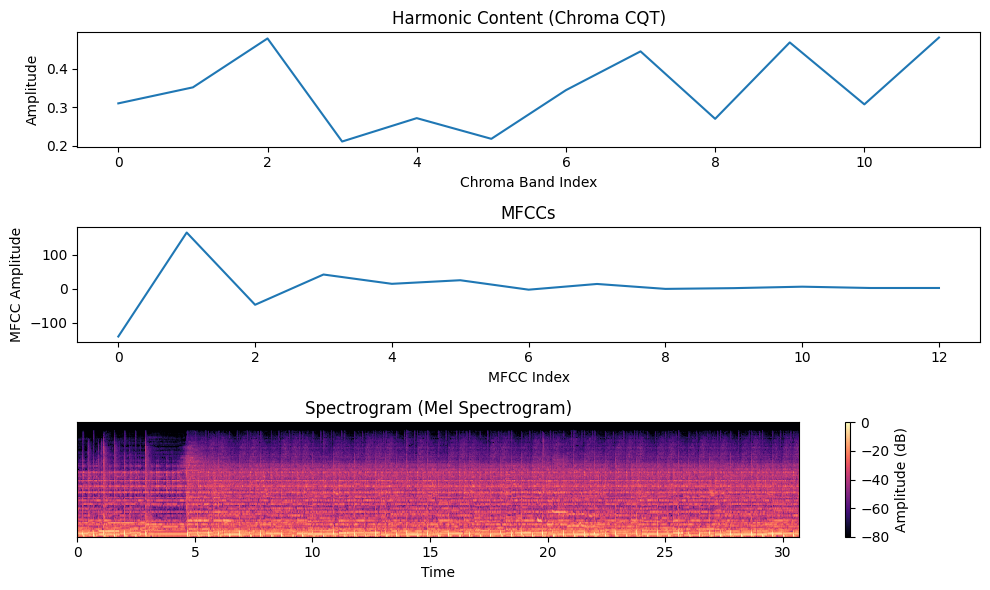

In [17]:
# Define the function to extract audio features
def extract_audio_features(audio_data):
    # Load the audio file
    y, sr = librosa.load(audio_data, sr=None)
    
    # Extract Harmonic Content (Chroma CQT)
    harmonic, _ = librosa.effects.hpss(y)
    harmonic_content = np.mean(librosa.feature.chroma_cqt(y=harmonic, sr=sr), axis=1)
    
    # Extract Frequency Distribution (MFCCs)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    
    # Extract Spectrogram Data (Mel Spectrogram)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to dB scale
    
    return harmonic_content, mfccs, mel_spectrogram_db, sr

# Define function to plot audio features
def plot_audio_features(harmonic_content, mfccs, mel_spectrogram_db, sr):
    # Plot harmonic content (Chroma CQT)
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.title("Harmonic Content (Chroma CQT)")
    plt.plot(harmonic_content)
    plt.xlabel('Chroma Band Index')
    plt.ylabel('Amplitude')
    
    # Plot MFCCs
    plt.subplot(3, 1, 2)
    plt.title("MFCCs")
    plt.plot(mfccs)
    plt.xlabel('MFCC Index')
    plt.ylabel('MFCC Amplitude')
    
    # Plot Spectrogram (Mel Spectrogram)
    plt.subplot(3, 1, 3)
    plt.title("Spectrogram (Mel Spectrogram)")
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', sr=sr)
    plt.colorbar(label='Amplitude (dB)')
    plt.tight_layout()
    plt.show()

# Example usage
audio_file = "Castle on the Hill.mp3"  # Replace with the path to your audio file
harmonic_content, mfccs, mel_spectrogram_db, sr = extract_audio_features(audio_file)

# Plot the audio features
plot_audio_features(harmonic_content, mfccs, mel_spectrogram_db, sr)
